## Chemical Langevin equation

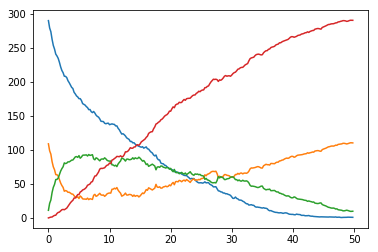

In [1]:
# Simple implementation of Euler-Maruyama to simulate the
# Chemical Langevin Equation for the Michaelis-Menten kinetics.
#
# Parameters from Chapter 7 of
# Stochastic Modelling for Systems Biology,
# by Darren J. Wilkinson, Chapman & Hall/CRC, 2006.
#
# Translated from:
# D.J. Higham "Modeling and Simulating Chemical Reactions" SIAM REVIEW 2008 50(2) p. 347–368
# http://www.maths.strath.ac.uk/˜aas96106/algfiles.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Stoichiometric matrix
V = np.array([[-1, 1, 0], [-1, 1, 1], [1, -1, -1], [0, 0, 1]]);

#%%%%%%%%% Parameters and Initial Conditions %%%%%%%%%
nA = 6.023e23; # Avagadro’s number
vol = 1e-15; # Volume of system

Y = np.zeros(4);
Y[0] = np.round(5e-7*nA*vol); # molecules of substrate
Y[1] = np.round(2e-7*nA*vol); # molecules of enzyme

c = np.zeros(3);
c[0] = 1e6/(nA*vol);
c[1] = 1e-4;
c[2] = 0.1;

a = np.zeros(3);
d = np.zeros(3);

tfinal = 50.0;
L = 250;
tau = tfinal/L; # stepsize

y0data = np.zeros(L);
y1data = np.zeros(L);
y2data = np.zeros(L);
y3data = np.zeros(L);

# Loop over time
for k in range(0,L):
    
    a[0] = c[0]*Y[0]*Y[1];
    a[1] = c[1]*Y[2];
    a[2] = c[2]*Y[2];
    
    d[0] = tau*a[0] + np.sqrt(np.abs(tau*a[0]))*np.random.randn();
    d[1] = tau*a[1] + np.sqrt(np.abs(tau*a[1]))*np.random.randn();
    d[2] = tau*a[2] + np.sqrt(np.abs(tau*a[2]))*np.random.randn();
    
    Y = Y + np.multiply(d[0],V[:,0]) + np.multiply(d[1],V[:,1]) + np.multiply(d[2],V[:,2]);
    
    y0data[k] = Y[0]
    y1data[k] = Y[1]
    y2data[k] = Y[2]
    y3data[k] = Y[3]

# Plot data
t = np.arange(0., tfinal, tau)

plt.plot(t,y0data)
plt.plot(t,y1data)
plt.plot(t,y2data)
plt.plot(t,y3data)
plt.show()